In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd

#### Data Preprocessing

In [2]:
data=pd.read_csv('Online_retail.csv')

In [3]:
data.head()

,# Sheet: Sheet1
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [4]:
data.shape

(7501, 1)

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(5176, 1)

In [12]:
data.isna().sum()

Products    0
dtype: int64

In [7]:
data.rename(columns={'# Sheet: Sheet1':'Products'},inplace=True)

In [8]:
data.head()

,Products
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [13]:
data1 = list(data["Products"].apply(lambda x:x.split(",") ))
data1

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

#### Association Rule Mining:

In [10]:
te=TransactionEncoder()

In [20]:
te_data=te.fit_transform(data1)

In [21]:
basket=pd.DataFrame(te_data,columns=te.columns_)

In [22]:
basket.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [33]:
frequent_itemsets=apriori(basket,min_support=0.01,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.029366,(almonds)
1,0.011206,(antioxydant juice)
2,0.045981,(avocado)
3,0.012558,(bacon)
4,0.015456,(barbecue sauce)
...,...,...
433,0.014683,"(olive oil, mineral water, spaghetti)"
434,0.016615,"(pancakes, mineral water, spaghetti)"
435,0.012365,"(shrimp, mineral water, spaghetti)"
436,0.010819,"(soup, mineral water, spaghetti)"


In [38]:
assoc_rules=association_rules(frequent_itemsets,min_threshold=0.5)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(chicken, chocolate)",(mineral water),0.021252,0.299845,0.011012,0.518182,1.728163,1.0,0.004640,1.453151,0.430500,0.035514,0.311840,0.277454
1,"(olive oil, chocolate)",(mineral water),0.023570,0.299845,0.011978,0.508197,1.694862,1.0,0.004911,1.423648,0.419878,0.038462,0.297579,0.274073
2,"(ground beef, eggs)",(mineral water),0.028787,0.299845,0.014490,0.503356,1.678717,1.0,0.005858,1.409771,0.416291,0.046125,0.290665,0.275840
3,"(ground beef, frozen vegetables)",(mineral water),0.024536,0.299845,0.013331,0.543307,1.811957,1.0,0.005974,1.533097,0.459382,0.042857,0.347726,0.293883
4,"(ground beef, frozen vegetables)",(spaghetti),0.024536,0.229521,0.012558,0.511811,2.229911,1.0,0.006926,1.578240,0.565425,0.052000,0.366383,0.283262
5,"(ground beef, milk)",(mineral water),0.031685,0.299845,0.016036,0.506098,1.687861,1.0,0.006535,1.417597,0.420869,0.050827,0.294581,0.279788
6,"(ground beef, pancakes)",(mineral water),0.020866,0.299845,0.010819,0.518519,1.729286,1.0,0.004563,1.454167,0.430714,0.034913,0.312321,0.277300
7,"(olive oil, milk)",(mineral water),0.024150,0.299845,0.012365,0.512000,1.707546,1.0,0.005124,1.434743,0.424619,0.039678,0.303011,0.276619
8,"(soup, milk)",(mineral water),0.021445,0.299845,0.012365,0.576577,1.922913,1.0,0.005935,1.653557,0.490474,0.040025,0.395243,0.308907
9,"(soup, spaghetti)",(mineral water),0.020672,0.299845,0.010819,0.523364,1.745448,1.0,0.004621,1.468952,0.436096,0.034934,0.319242,0.279723


In [39]:
assoc_rules=assoc_rules.sort_values(by='lift',ascending=False)

In [40]:
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,"(ground beef, frozen vegetables)",(spaghetti),0.024536,0.229521,0.012558,0.511811,2.229911,1.0,0.006926,1.578240,0.565425,0.052000,0.366383,0.283262
8,"(soup, milk)",(mineral water),0.021445,0.299845,0.012365,0.576577,1.922913,1.0,0.005935,1.653557,0.490474,0.040025,0.395243,0.308907
3,"(ground beef, frozen vegetables)",(mineral water),0.024536,0.299845,0.013331,0.543307,1.811957,1.0,0.005974,1.533097,0.459382,0.042857,0.347726,0.293883
9,"(soup, spaghetti)",(mineral water),0.020672,0.299845,0.010819,0.523364,1.745448,1.0,0.004621,1.468952,0.436096,0.034934,0.319242,0.279723
6,"(ground beef, pancakes)",(mineral water),0.020866,0.299845,0.010819,0.518519,1.729286,1.0,0.004563,1.454167,0.430714,0.034913,0.312321,0.277300
0,"(chicken, chocolate)",(mineral water),0.021252,0.299845,0.011012,0.518182,1.728163,1.0,0.004640,1.453151,0.430500,0.035514,0.311840,0.277454
7,"(olive oil, milk)",(mineral water),0.024150,0.299845,0.012365,0.512000,1.707546,1.0,0.005124,1.434743,0.424619,0.039678,0.303011,0.276619
1,"(olive oil, chocolate)",(mineral water),0.023570,0.299845,0.011978,0.508197,1.694862,1.0,0.004911,1.423648,0.419878,0.038462,0.297579,0.274073
5,"(ground beef, milk)",(mineral water),0.031685,0.299845,0.016036,0.506098,1.687861,1.0,0.006535,1.417597,0.420869,0.050827,0.294581,0.279788
2,"(ground beef, eggs)",(mineral water),0.028787,0.299845,0.014490,0.503356,1.678717,1.0,0.005858,1.409771,0.416291,0.046125,0.290665,0.275840


In [41]:
assoc_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
4,"(ground beef, frozen vegetables)",(spaghetti),0.012558,0.511811,2.229911
8,"(soup, milk)",(mineral water),0.012365,0.576577,1.922913
3,"(ground beef, frozen vegetables)",(mineral water),0.013331,0.543307,1.811957
9,"(soup, spaghetti)",(mineral water),0.010819,0.523364,1.745448
6,"(ground beef, pancakes)",(mineral water),0.010819,0.518519,1.729286


### **Analysis and Interpretation:**

•	Analyse the generated rules to identify interesting patterns and relationships between the products.

•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


#### 
The analysis of the association rules reveals several notable patterns in customer purchasing behavior centered around specific items:

Mineral Water is a highly associated consequent, appearing in 8 out of 10 rules. Its frequently bought alongside common pantry or meal items such as:

Ground beef,
Milk,
Soup,
Olive oil,
Pancakes,
Chocolate,
Eggs.

Overall, mineral water, ground beef, milk, and spaghetti emerge as high-impact items around which consistent shopping patterns form. These products are ideal anchors for recommendation systems, cross-promotions, and store layout decisions.

##### Visualization

In [46]:
import matplotlib.pyplot as plt

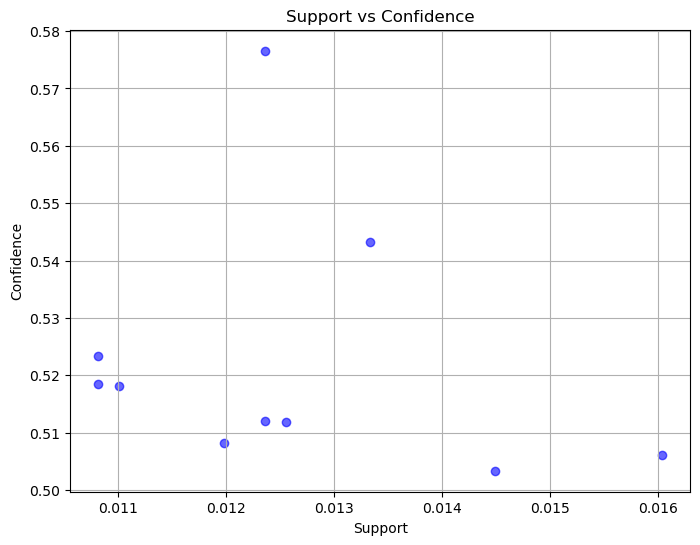

In [47]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(assoc_rules['support'], assoc_rules['confidence'], alpha=0.6, c='blue')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid()
plt.show()

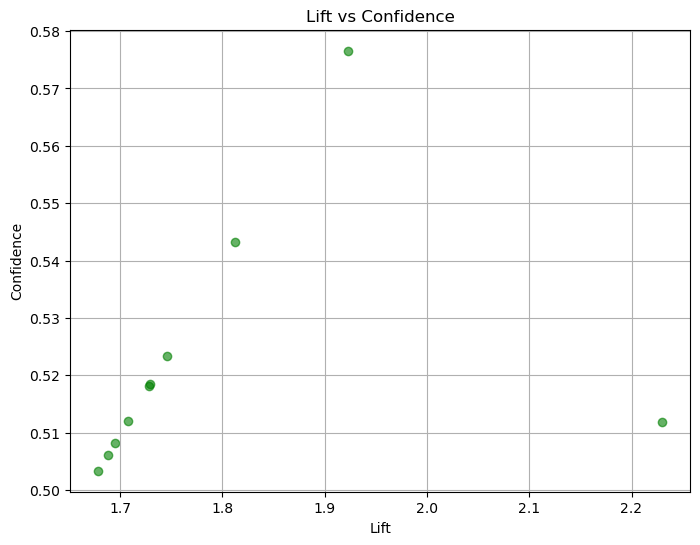

In [50]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(assoc_rules['lift'], assoc_rules['confidence'], alpha=0.6, c='green')
plt.title('Lift vs Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid()
plt.show()

### **Interview Questions:**

**1.	What is lift and why is it important in Association rules?**

Lift is a metric that measures how much more likely two items are to be bought together compared to if they were independent of each other. It helps to identify strong relationships between items.

**Formula:**

Lift = Confidence (A → B) / Support (B)

where:

Confidence (A → B): Likelihood of buying B if A is bought.
Support (B): Probability of buying B.

**Interpretation:**

Lift > 1: Items A and B are positively associated (buying A increases the likelihood of buying B).

Lift = 1: Items A and B are independent (no association).

Lift < 1: Items A and B are negatively associated (buying A decreases the likelihood of buying B).

**Importance:**

Identifies meaningful associations: High-lift rules highlight strong relationships.
Helps prioritize rules: Rules with high lift are more likely to offer actionable insights.

**2.	What is support and Confidence. How do you calculate them?**

**Support:**

Definition:

Support represents the proportion of transactions in which a specific itemset appears.
It reflects the popularity of the itemset in the dataset.

Formula:

Support(A) = Number of transactions containing A / Total number of transactions


**Confidence:**

Definition:

Confidence measures the likelihood of buying item B given that item A is bought.
It reflects the strength of the rule.
Formula:

Confidence(A → B) = Support(A ∩ B) / Support(A)

where
𝐴
∩
𝐵
A∩B means both A and B occur in the same transaction.

**3.	What are some limitations or challenges of Association rules mining?**

Scalability:

Generating frequent itemsets and association rules can be computationally expensive for large datasets.
Algorithms like Apriori need to iterate through the dataset multiple times, increasing time complexity.

Too Many Rules:

Association rule mining often generates a large number of rules, many of which may not be meaningful.
Filtering rules using thresholds (support, confidence, lift) is essential but can still leave many trivial or redundant rules.

Low Support for Rare Items:

Rare but meaningful itemsets (e.g., high-value products) may not be discovered if the support threshold is set too high.

Interpretability:

Understanding and deriving actionable insights from complex or large sets of rules can be challenging.

Context-Dependency:

Rules may not always make sense in certain business contexts. For example, buying milk and bread together might make sense in grocery retail but not in other domains.

Data Preprocessing Challenges:

Data cleaning, handling missing values, and transforming data into a transactional format (e.g., one-hot encoding) can be tedious and error-prone.

Assumption of Independence:

Association rule mining assumes items occur independently, which may not always hold true. Relationships may be influenced by external factors.